In [3]:
!pip3 install --user matplotlib

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

This workflow takes as input a text file containing **17,438 randomly chosen words out of 78,449** from  and plots the frequency of the top 25 used words. `word count` creates a count of each word. `sort words` sorts the previously created mapping orderered by count, descending. `plot words` generates a plot illustrating word frequency.  

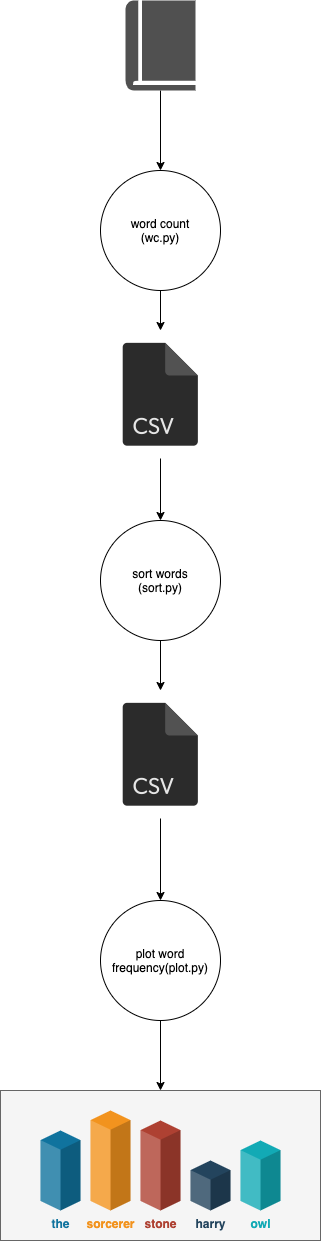

In [12]:
from IPython.display import Image
Image(filename='/home/scitech/shared-data/sample-text-analysis-wf/hp-analysis.png') 

In [13]:
import logging

from Pegasus.api import *

logging.basicConfig(level=logging.DEBUG)

# --- Workflow Input Files --------------------------------------------------------------------
input_text = File("hp.txt")
rc = ReplicaCatalog()
rc.add_replica("local", input_text, "/home/scitech/shared-data/sample-text-analysis-wf/hp.txt")
rc.write()

# --- Workflow Executables --------------------------------------------------------------------
word_count = Transformation(
                "word_count",
                site="local",
                pfn="/home/scitech/shared-data/sample-text-analysis-wf/wc.py",
                is_stageable=True
            )
sort = Transformation(
                "sort",
                site="local",
                pfn="/home/scitech/shared-data/sample-text-analysis-wf/sort.py",
                is_stageable=True
            )
plot = Transformation(
                "plot",
                site="local",
                pfn="/home/scitech/shared-data/sample-text-analysis-wf/plot.py",
                is_stageable=True
            )

tc = TransformationCatalog()
tc.add_transformations(word_count, sort, plot)
tc.write()

# --- Workflow --------------------------------------------------------------------------------
wf = Workflow("harry-potter-text-analysis")

# process text
counted_words_file = File("wc.txt")
job_count_words = Job(word_count)
job_count_words.add_inputs(input_text)
job_count_words.add_outputs(counted_words_file)

# further process text
sorted_words_file = File("wc-sorted.txt")
job_sort_words = Job(sort)
job_sort_words.add_inputs(counted_words_file)
job_sort_words.add_outputs(sorted_words_file)

# generate a plot of data
plot_file = File("plot.png")
job_plot_data = Job(plot)
job_plot_data.add_inputs(sorted_words_file)
job_plot_data.add_outputs(plot_file)

# add jobs to workflow
wf.add_jobs(
    job_count_words,
    job_sort_words,
    job_plot_data
)

# run workflow
try:
    wf.plan(submit=True)
    wf.wait()
    wf.statistics()
except PegasusClientError as e:
    print(e.output)


################
# pegasus-plan #
################
[main] WARN  schema.JsonMetaSchema  - Unknown keyword $defs - you should define your own Meta Schema. If the keyword is irrelevant for validation, just use a NonValidationKeyword
[main] WARN  schema.JsonMetaSchema  - Unknown keyword additionalItems - you should define your own Meta Schema. If the keyword is irrelevant for validation, just use a NonValidationKeyword
[main] WARN  schema.JsonMetaSchema  - Unknown keyword examples - you should define your own Meta Schema. If the keyword is irrelevant for validation, just use a NonValidationKeyword
2020.08.04 16:27:00.775 UTC:
2020.08.04 16:27:00.780 UTC:   -----------------------------------------------------------------------
2020.08.04 16:27:00.785 UTC:   File for submitting this DAG to HTCondor           : harry-potter-text-analysis-0.dag.condor.sub
2020.08.04 16:27:00.791 UTC:   Log of DAGMan debugging messages                 : harry-potter-text-analysis-0.dag.dagman.out
2020.08.04 1

[##################################################] 100.0% ..Success (Completed: 19, Queued: 0, Running: 0, Failed: 0)



######################
# pegasus-statistics #
######################
Your database is compatible with Pegasus version: 5.0.0dev

#
# Pegasus Workflow Management System - http://pegasus.isi.edu
#
# Workflow summary:
#   Summary of the workflow execution. It shows total
#   tasks/jobs/sub workflows run, how many succeeded/failed etc.
#   In case of hierarchical workflow the calculation shows the
#   statistics across all the sub workflows.It shows the following
#   statistics about tasks, jobs and sub workflows.
#     * Succeeded - total count of succeeded tasks/jobs/sub workflows.
#     * Failed - total count of failed tasks/jobs/sub workflows.
#     * Incomplete - total count of tasks/jobs/sub workflows that are
#       not in succeeded or failed state. This includes all the jobs
#       that are not submitted, submitted but not completed etc. This
#       is calculated as  difference between 'total' count and sum of
#       'succeeded' and 'failed' count.
#     * Total - total count 

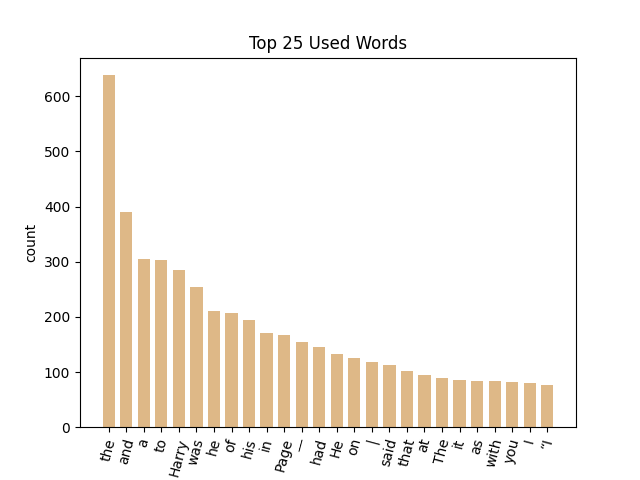

In [14]:
Image(filename='/home/scitech/shared-data/sample-text-analysis-wf/wf-output/plot.png') 